# Introduction

For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). 

Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

## Libraries & Packages Importing

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
#Importing & Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/My Drive/Dataset/customer_booking.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Exploartory Data Analysis

In [5]:
df.shape

(50000, 14)

In [6]:
# 2. Check for missing values
print(df.isna().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


No missing values

In [7]:
# 4. Check the data types of each column
print(df.dtypes)

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


In [8]:
#change flight duration to int
df["flight_duration"] = df["flight_duration"].astype(int)

In [9]:
# 6. Check for duplicate rows
print(df.duplicated().sum())

719


In [10]:
# 7. Remove duplicate rows
df = df.drop_duplicates()

In [11]:
# 6. Check for duplicate rows
print(df.duplicated().sum())

0


### Visualizations

In [12]:
import matplotlib.pyplot as plt

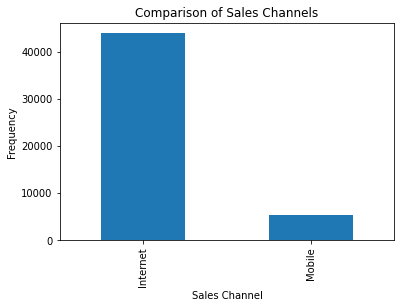

In [13]:
# Plot a bar plot to compare sales channels
sales_channel_counts = df["sales_channel"].value_counts()
sales_channel_counts.plot(kind="bar")
plt.xlabel("Sales Channel")
plt.ylabel("Frequency")
plt.title("Comparison of Sales Channels")
plt.show()


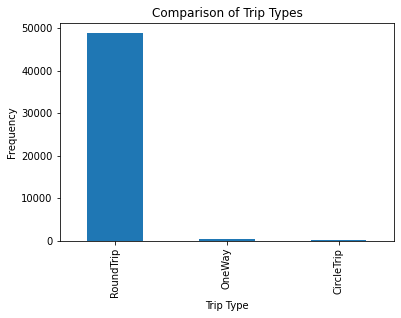

In [14]:
# Plot a bar plot to compare trip types
trip_type_counts = df["trip_type"].value_counts()
trip_type_counts.plot(kind="bar")
plt.xlabel("Trip Type")
plt.ylabel("Frequency")
plt.title("Comparison of Trip Types")
plt.show()


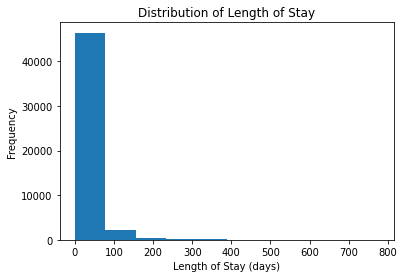

In [15]:
# Plot a histogram of length of stay
plt.hist(df["length_of_stay"], bins=10)
plt.xlabel("Length of Stay (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Length of Stay")
plt.show()


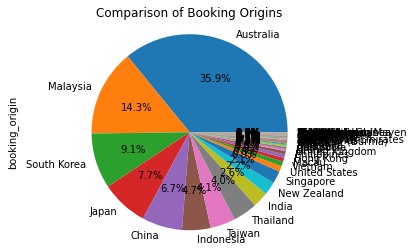

In [16]:
# Plotting a pie chart to compare booking origins
booking_origin_counts = df["booking_origin"].value_counts()
booking_origin_counts.plot(kind="pie", autopct='%1.1f%%')
plt.axis('equal')
plt.title("Comparison of Booking Origins")
plt.show()


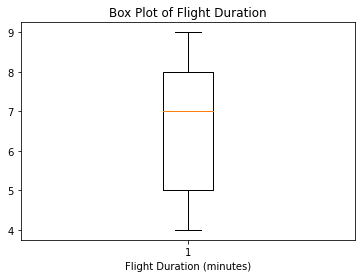

In [17]:
# box plot of flight duration
plt.boxplot(df["flight_duration"])
plt.xlabel("Flight Duration (minutes)")
plt.title("Box Plot of Flight Duration")
plt.show()


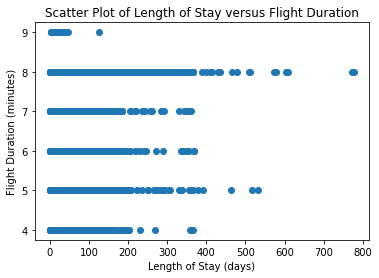

In [18]:
# length of stay versus flight duration
plt.scatter(df["length_of_stay"], df["flight_duration"])
plt.xlabel("Length of Stay (days)")
plt.ylabel("Flight Duration (minutes)")
plt.title("Scatter Plot of Length of Stay versus Flight Duration")
plt.show()


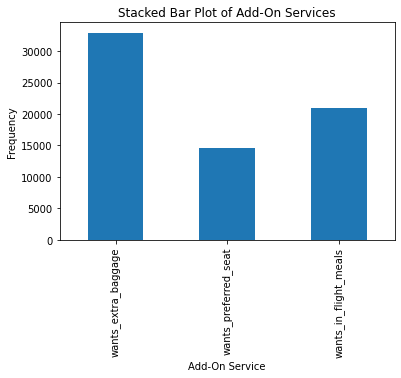

In [19]:
#plot of add-on services
df_add_ons = df[["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"]]
df_add_ons.sum().plot(kind="bar", stacked=True)
plt.xlabel("Add-On Service")
plt.ylabel("Frequency")
plt.title("Stacked Bar Plot of Add-On Services")
plt.show()


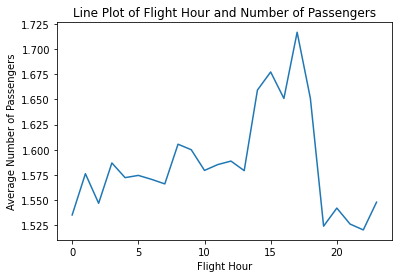

In [20]:
# Plot a line plot of flight hour and number of passengers
df.groupby("flight_hour")["num_passengers"].mean().plot(kind="line")
plt.xlabel("Flight Hour")
plt.ylabel("Average Number of Passengers")
plt.title("Line Plot of Flight Hour and Number of Passengers")
plt.show()


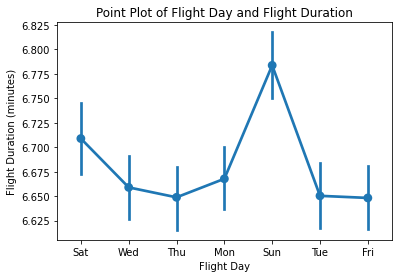

In [21]:
# Plot a point plot of flight day and flight duration
sns.pointplot(x="flight_day", y="flight_duration", data=df)
plt.xlabel("Flight Day")
plt.ylabel("Flight Duration (minutes)")
plt.title("Point Plot of Flight Day and Flight Duration")
plt.show()


### Mutual Info

In [22]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [23]:
X.dtypes

num_passengers           int64
sales_channel            int64
trip_type                int64
purchase_lead            int64
length_of_stay           int64
flight_hour              int64
flight_day               int64
route                    int64
booking_origin           int64
wants_extra_baggage      int64
wants_preferred_seat     int64
wants_in_flight_meals    int64
flight_duration          int64
dtype: object

In [24]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.055653
booking_origin           0.049033
flight_duration          0.012890
length_of_stay           0.007690
wants_extra_baggage      0.005139
num_passengers           0.004341
wants_in_flight_meals    0.003977
sales_channel            0.002743
wants_preferred_seat     0.002629
purchase_lead            0.002475
trip_type                0.000000
flight_hour              0.000000
flight_day               0.000000
Name: MI Scores, dtype: float64

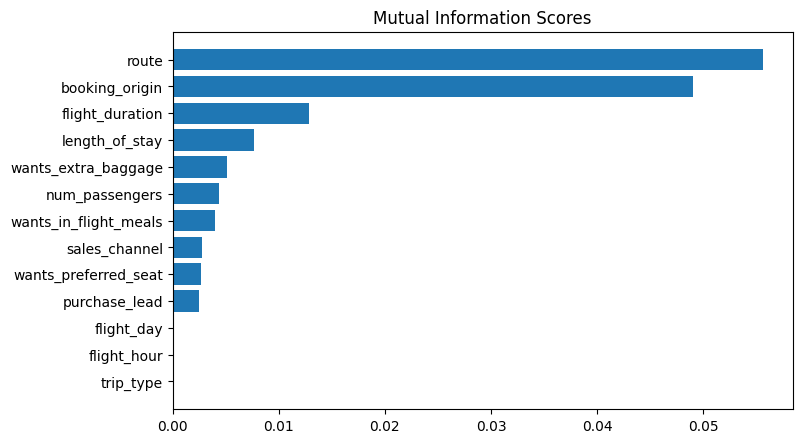

In [25]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

the top 3 features which are dependant with booking_complete feature are:
- route
- booking origin
- flight duration

In [33]:
from sklearn.model_selection import train_test_split
def split_dataset(X, y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25, random_state=0)
    return train_X, val_X, train_y, val_y



In [34]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

## Building a Random forest classifier 

In [35]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

features = ['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X = pd.get_dummies(df[features], columns=features)
X = scale(X)
y = df.booking_complete

X_train, X_val, y_train, y_val = split_dataset(X, y)

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, preds) * 100)
print("AUC:", roc_auc_score(y_val, preds))


Accuracy: 83.36207771127118
AUC: 0.5552591313409626
